# Sprint 機械学習スクラッチ クラスタリング

class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  tol
        self.verbose = verbose
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        for i in range(self.n_clusters):
            # 中心値の初期値の取得
            center_array = np.random.permutation(X)[:1] # 行列内の配列を1行ランダムに取得
            
            # クラスターラベル
            self.labels = np.random.randint(0, self.n_clusters, n_samples)
            
            # 中心値の更新
            for j in range(self.max_iter):
                
            
            
            
        
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

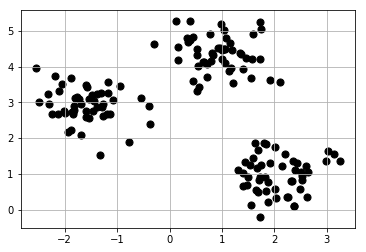

In [3]:
plt.scatter(X[:,0],X[:,1],c='black',marker='o',s=50)
plt.grid()
plt.show()

In [4]:
# sklearn
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,            # クラスターの個数
            init='random',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
            max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
            tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態

km_pred = km.fit_predict(X)

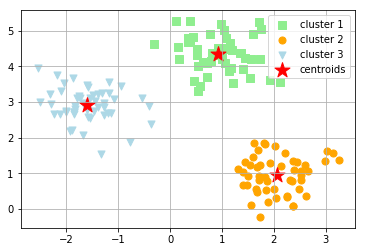

In [5]:
plt.scatter(X[km_pred==0,0],         # 　km_pred（クラスター番号）が0の時にXの0列目を抽出
                    X[km_pred==0,1], # 　km_pred（クラスター番号）が0の時にXの1列目を抽出
                    s=50,
                    c='lightgreen',
                    marker='s',
                    label='cluster 1')
plt.scatter(X[km_pred==1,0],
                    X[km_pred==1,1],
                    s=50,
                    c='orange',
                    marker='o',
                    label='cluster 2')
plt.scatter(X[km_pred==2,0],
                   X[km_pred==2,1],
                    s=50,
                    c='lightblue',
                    marker='v',
                    label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],   # km.cluster_centers_には各クラスターのセントロイドの座標が入っている
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend()
plt.grid()
plt.show()


In [6]:
# SSE
print ('Distortion: %.2f'% km.inertia_)

Distortion: 72.48


## 問題1−7はクラス内に実装

In [7]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init=10, max_iter=20, tol=1e-5, verbose=False, random_state=0):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.random_state = random_state
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
#         self.center_array = np.zeros((self.n_features, self.n_init))
        self.cluster_array = np.zeros((self.n_samples, self.n_clusters))
        self.distance_array = np.zeros(self.n_clusters)
        self.labels = np.arange(self.n_clusters)
        self.best_sse = 10000
        self.best_center = None
        
        self.iter = 0  # ループカウント用
        
        # 問題6 n_init数ループ処理
        for i in range(self.n_init):
            # 中心点の初期値の取得
            self.center_array = np.random.permutation(X)[:self.n_clusters]  # (特徴量, クラスタ数) 行列内の配列を1行ランダムに取得
            
            for j in range(self.max_iter):
                # クラスタ振分け
                self.cluster_array = self._cluster_build(X)
                
                # 中心点の更新
                self.update_center = self._update_centers(self.cluster_array)

                # 初期中心点と重心点の差異の計算
                diff = (self.center_array - self.update_center).sum()
                
                # 問題5 break処理
                if diff <= self.tol:                 # tol以下になったら
                    self.best_center = self.update_center
                    break
                
                self.iter += 1    # ループカウント用            
            
                # SSEの計算
                sse_score = self._sse(self.cluster_array)

                # SSEベストスコアの更新（小さい値の方が優）
                if sse_score < self.best_sse:
                    self.best_sse = sse_score
                    self.best_center = self.update_center

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("学習回数", self.iter+1)
            print("default_center", self.center_array)
            print("finish_center", self.update_center)
            print("SSE_score", self.best_sse)
    
    # 問題7
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        
        X : testデータ
        
        return
        pred_array : shape(testデータ,）のnd_array
        
        """
        distance_array = np.zeros(self.n_clusters)  #(3, )  各クラスタとの距離を比較する箱
        pred_array = np.zeros(X.shape[0])
      
        for idx in range(X.shape[0]):
            for j in range(self.n_clusters):
                # distance_arrayに各特徴量と各クラスターの中心地でノルム計算し格納
                distance_array[j] = np.linalg.norm(X[idx] - self.best_center[j])
                
                # distance_arrayの中から一番小さいインデックスを抽出し、ラベルとして返す
                pred_array[idx] = int(np.argmin(distance_array))

        return pred_array
    
    # 問題3
    # クラスタに割り当てる関数
    def _cluster_build(self, X):
        """
        各特徴量と中心点の距離を測り、クラスタラベルに分割していく関数
        X: trainデータ
        
        return
        cluster_array : shape(n_cluster, n_features)のnd_array
        
        """
        distance_array = np.zeros(self.n_clusters)  #(3, )  各クラスタとの距離を比較する箱
        cluster_array = np.zeros((self.n_samples, self.n_features + 1))  #(150, 3)
        
        # 中心値の初期値の取得
        # ループ回数が1回目の場合
        if self.iter == 0:   
            center_array = self.center_array
        
        # 中心点の更新
        # ループ回数が2回目以降の場合
        else:
            center_array = self._update_centers(self.cluster_array)

        for idx in range(self.n_samples):            
            for j in range(self.n_clusters):
                # distance_arrayに各特徴量と各クラスターの中心地でノルム計算し格納
                distance_array[j] = np.linalg.norm(X[idx] - center_array[j])   #(n_cluster, n_features)
                
                # distance_arrayの中から一番小さいインデックスを抽出し、X（特徴量）と結合
                cluster_array[idx] = np.hstack((X[idx], np.argmin(distance_array)))
        
        return cluster_array

    # 問題2
    # SSEを求める関数
    # TODO綺麗なコードにしたい
    def _sse(self, cluster_array):
        """
        SSEを求める関数
        
        """
        sse = 0
        
        for k in range(self.n_clusters):
            # cluster_arrayの最終列のラベルと照合し、計算必要な特徴量だけ抽出
            d = cluster_array[cluster_array[: , -1] == k][: , :self.n_features] - self.update_center[k]
            sse += np.linalg.norm(d)**2
        
        return sse

    # 問題4
    # 重心点の更新
    def _update_centers(self, cluster_array):
        """
        各クラスターの中心点を更新する関数
        
        """
        update_center = np.zeros((self.n_clusters, self.n_features))    # (クラスタ数, 特徴量数)
        
        # 各クラスターの平均値を取得
        for i in range(self.n_clusters):
            update_center[i] = cluster_array[cluster_array[: ,-1] == self.labels[i]].mean(axis=0)[:self.n_features]
        
        return update_center

In [8]:
scr_km = ScratchKMeans(n_clusters=3, max_iter=10, verbose=False)

scr_km.fit(X)
scr_km_pred = scr_km.predict(X)

In [9]:
#SSE
scr_km.best_sse

72.47601670996698

In [51]:
# 散布図作成の関数
def scatter_plot(model):
    a = model.cluster_array
    b = model.best_center
    c = model.center_array
    
    for i in range(len(b)):
        plt.scatter(a[a[:, 2]==i][:, 0], a[a[:, 2]==i][:, 1], marker="s", label="cluster{}".format(i))
    
    plt.scatter(b[:, 0], b[:, 1], marker="*", c="r", s=250, label="best_centroids")
    plt.scatter(c[:, 0], c[:, 1], marker="^", c="k", s=50, label="default_centroids")
    
    plt.grid()
    plt.legend()
    plt.show()

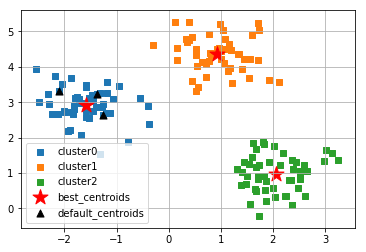

In [52]:
scatter_plot(scr_km)

# 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

# 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE=N∑n=1K∑k=1 rnk∥Xn−μk∥2
$$

$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : $n$番目のデータ点


$\mu_k$ : $k$番目の中心点


$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

# 【問題3】クラスタへの割り当て
全てのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。


∥
q
−
p
∥
=
√
(
q
−
p
)
⋅
(
q
−
p
)

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 $\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

# 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

# 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

# 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。1m

# 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。


データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。


## 全予測が同じになった

# 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。



## 参考
[Qlitaページ](https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2)

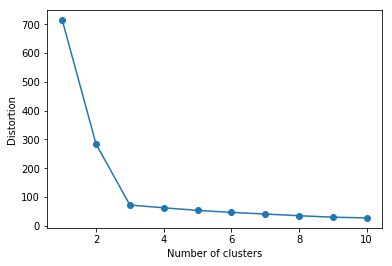

In [12]:
# Qlita記載の参考コード
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

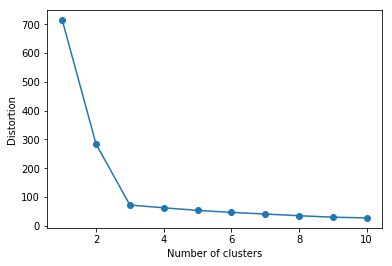

In [15]:
# Qlita記載の参考コード
scr_distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    scr_km = ScratchKMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    scr_km.fit(X)                         # クラスタリングの計算を実行
    scr_distortions.append(scr_km.best_sse)   # scr_km.fitするとscr_km.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## sklearnと同じような波形になった。
- クラスター数はSSEの値が急激に落下している「3」が良いものだと推察できる。

# 【問題9】（アドバンス課題）シルエット図
$k$ を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


silhouette_avg : float、シルエット係数の平均値


y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


cluster_labels : list、クラスタのラベル名のリスト


n_clusters : int、クラスタ数


$n$ 番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。


s
n
=
b
n
−
a
n
m
a
x
(
b
n
,
a
n
)

$a_n$ : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


$b_n$ : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 $b$ が大きく、凝集度 $a$ が小さい時が理想的であり、シルエット係数 $s$ は1に近くなります。



## 回答なし

# 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。



## 3.クラスタ分析

卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。


《PCAのサンプルコード》


1
2
3
4
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

《PCAの分散説明率を表示するコードサンプル》


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [13]:
df = pd.read_csv("./Wholesale customers data.csv")
df = df.drop(df.iloc[:, :2], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df)
data_pca = pca.transform(df)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


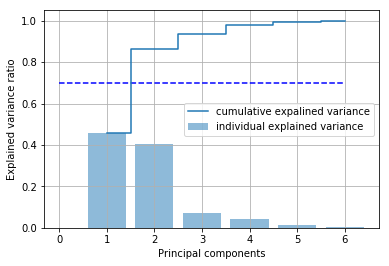

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

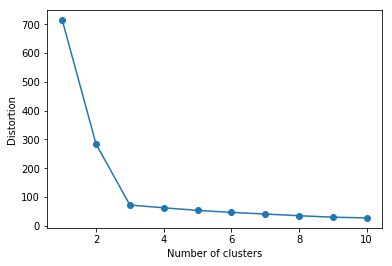

In [19]:
# 問題8同様にエルボー法での描画を実施
scr_distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    scr_km = ScratchKMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    scr_km.fit(data_pca)                         # クラスタリングの計算を実行
    scr_distortions.append(scr_km.best_sse)   # scr_km.fitするとscr_km.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## シンプルデータセット3と同じような波形になった。
- クラスター数は3~4個が適切であると思われる。
- 以下図示しても3つのクラスタで適度に分けられていることがわかる。また外れ値のようなものが存在するが、おおよそ左下に集まっていることがわかる。

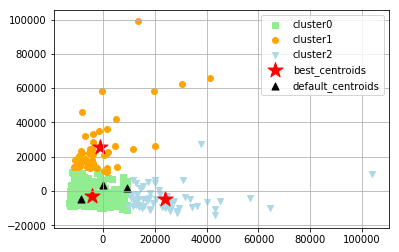

In [16]:
# wholesale
# クラスタ3つで学習
scr_km_ws = ScratchKMeans(n_clusters=3, n_init=10, max_iter=300)
scr_km_ws.fit(data_pca)
scatter_plot(scr_km_ws)

# 【問題11】既知のグループとの比較

RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

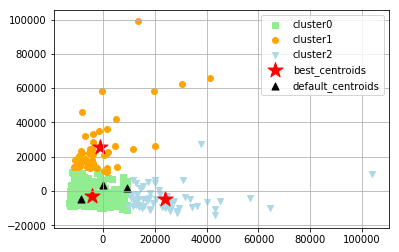

In [35]:
# スクラッチモデルのクラスタ図示
scatter_plot(scr_km_ws)

In [18]:
# 再度読み込み
df_ws = pd.read_csv("./Wholesale customers data.csv")

# channelとRegionのカラムと次元削減した2カラムを結合する
df_ws_drop = df_ws.drop(df_ws.columns[2:8], axis=1)

df_concat = pd.concat((df_ws_drop, pd.DataFrame(data_pca)), axis=1)
df_concat.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


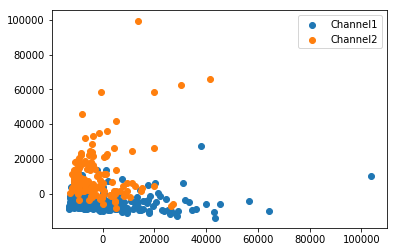

In [44]:
# Channel別で散布図作成
for i in range(1, 3):
    plt.scatter(df_concat[df_concat.iloc[:, 0]==i].iloc[:, 2], df_concat[df_concat.iloc[:, 0]==i].iloc[:, 3], label="Channel{}".format(i))

plt.legend()
plt.show()

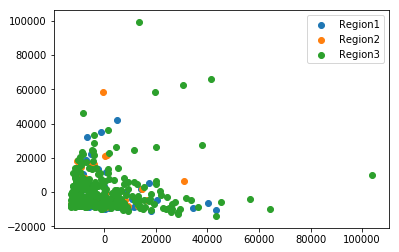

In [43]:
# Region別で散布図作成
for i in range(1, 4):
    plt.scatter(df_concat[df_concat.iloc[:, 1]==i].iloc[:, 2], df_concat[df_concat.iloc[:, 1]==i].iloc[:, 3], label="Region{}".format(i))

plt.legend()
plt.show()

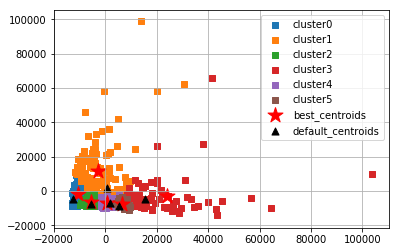

In [53]:
# wholesale
# クラスタ6つで学習(ChannelとRegionの各ラベルのユニーク数２＊３=６の組み合わせ)
scr_km_ws6= ScratchKMeans(n_clusters=6, n_init=10, max_iter=300)
scr_km_ws6.fit(data_pca)
scatter_plot(scr_km_ws6)

## 考察
- Channelは次元削減した際の「0」（ｘ軸）が下限〜上限まで分布しているのがChannel１、「１」（ｙ軸）が下限〜上限まで分布しているのがChannel2という若干の傾向がある。
- Regionは分布上は様々で傾向は見られない。

# 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


pandas.DataFrame.groupby — pandas 0.23.4 documentation



In [54]:
# 全体の統計値
df_ws.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [83]:
# Channelを第一軸として平均値を取得
df_ws.groupby(["Channel"]).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


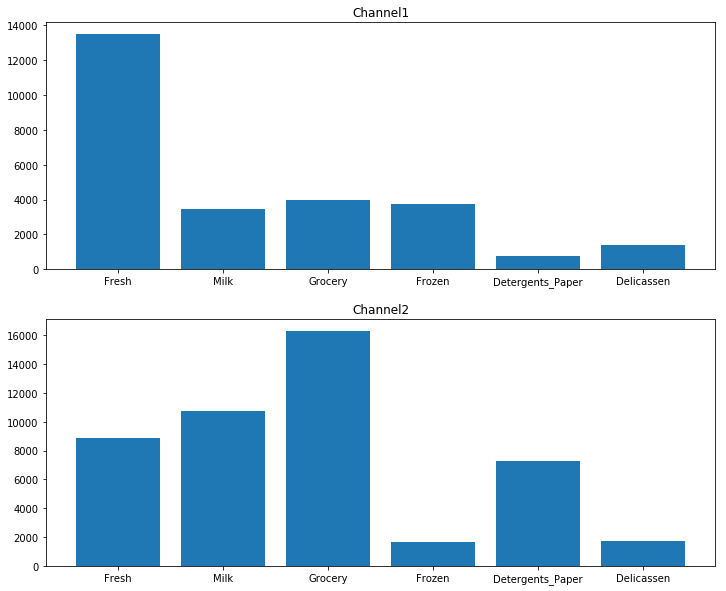

In [104]:
x = df_ws.columns[2:]

fig, ax = plt.subplots(2, figsize=(12, 10))

ax[0].bar(x, df_ws[df_ws["Channel"]==1].iloc[:, 2:].mean())
ax[0].set_title("Channel1")
ax[1].bar(x, df_ws[df_ws["Channel"]==2].iloc[:, 2:].mean())
ax[1].set_title("Channel2")

plt.show()

## Channel1とChannel2の各6カラムで値に大きな差がある。全体的にChannel2の方が大きな値を取っている傾向だが、「Fresh」「Frozen」カラムはChannel１のほうが大きい

In [84]:
# Regionを第一軸として平均値を取得
df_ws.groupby(["Region"]).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


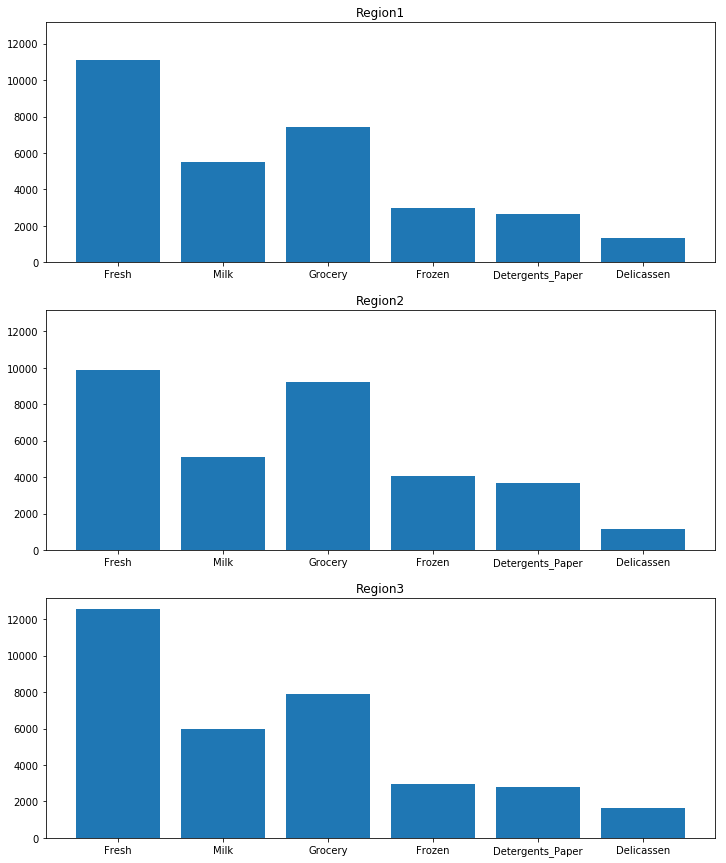

In [103]:
x = df_ws.columns[2:]

fig, ax = plt.subplots(3, figsize=(12, 15), sharey=True)

ax[0].bar(x, df_ws[df_ws["Region"]==1].iloc[:, 2:].mean())
ax[0].set_title("Region1")
ax[1].bar(x, df_ws[df_ws["Region"]==2].iloc[:, 2:].mean())
ax[1].set_title("Region2")
ax[2].bar(x, df_ws[df_ws["Region"]==3].iloc[:, 2:].mean())
ax[2].set_title("Region3")

plt.show()

## Channelほど傾向値（閾値）は見られないが、GroceryやFrozenやDatergents_paperはRegion2が大きく、DelicassenはRegion3が大きい。

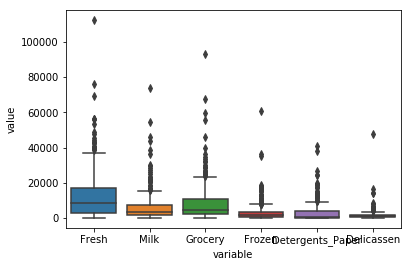

In [116]:
# カラム別箱ひげ図
df_melt = pd.melt(df)

sns.boxplot(x="variable", y="value", data=df_melt)

## 外れ値等を確認するべく、箱ひげ図をプロットしたが、どのカラムも箱の大きさと上部の外れ値の比率は同じようなもので、何か有益な情報となりえるものは発見できず。

In [123]:
# 既知クラスごとにデータフレーム作成
df_channel1 = df_ws[df_ws["Channel"]==1]
df_channel2 = df_ws[df_ws["Channel"]==2]

df_region1 = df_ws[df_ws["Region"]==1]
df_region2 = df_ws[df_ws["Region"]==2]
df_region3 = df_ws[df_ws["Region"]==3]

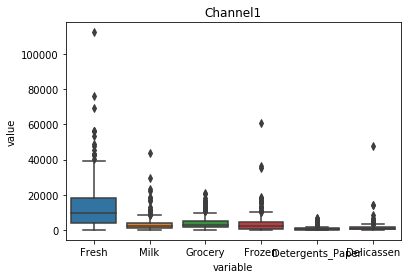

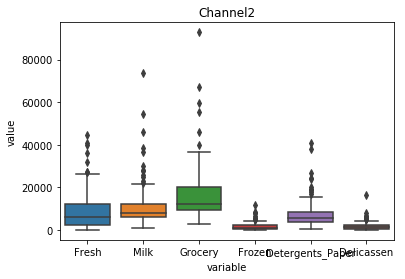

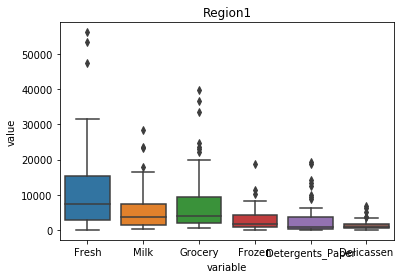

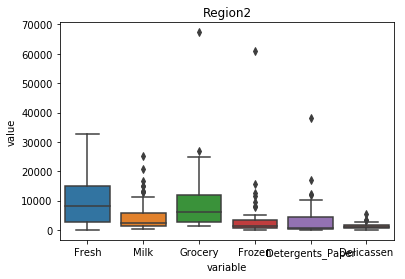

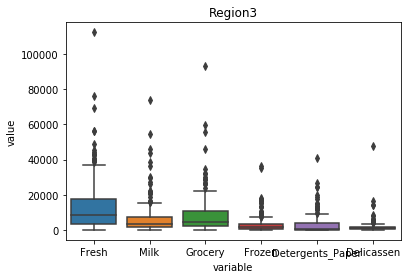

In [136]:
df_dict = {"Channel1":df_channel1,
           "Channel2":df_channel2,
           "Region1":df_region1, 
           "Region2":df_region2,
           "Region3":df_region3}

fig = plt.figure()
for name, df in df_dict.items():
    df = df.drop(df.columns[0:2], axis=1)
    df_melt = pd.melt(df)
    sns.boxplot(x="variable", y="value", data=df_melt).set_title(name)
    plt.show()

## 既知クラスごとに箱ひげ図をプロット
- Channel1とChannel2での相違：「Fresh」の分布が大きく違い明らかにChannel1の方が平均や最大値が大きい。「Fresh」以外のカラムはChannel2の方が大きい
- Regionは、1と２に比べ３の分布レンジ(範囲)が大きい。高消費層地域と判断できると思う。1<2<3の消費地域の順序と言えるのではないかと判断。

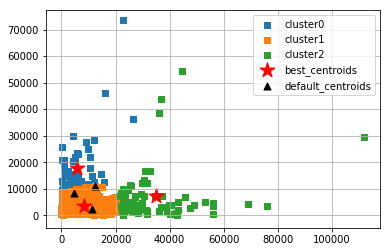

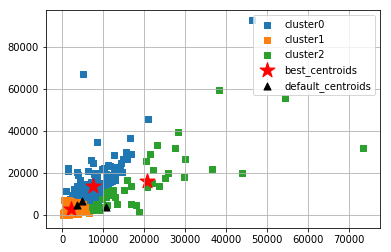

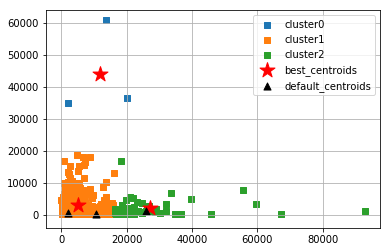

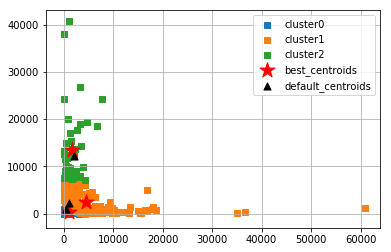

In [107]:
# 元のフレームの特徴量でクラスタリング
X_ws = df_ws.drop(df_ws.columns[0:2], axis=1).values

for i in range(4):
    X_tmp = X_ws[:, i: i+2]
    scr_km_loops = ScratchKMeans(n_clusters=3, n_init=10, max_iter=100)
    scr_km_loops.fit(X_tmp)
    scatter_plot(scr_km_loops)

## 上記グラフ
- 上から['Fresh', 'Milk'],['Milk', 'Grocery'], ['Grocery', 'Frozen']['Frozen', 'Detergents_Paper']のクラスタリンググラフ。
- ３クラスタにしっかり分類できているのは['Fresh', 'Milk'],['Milk', 'Grocery']この２つだけ。

## 最終回答
- 卸売業者にとって最も有益な情報は、「Region」と推察。それは箱ひげ図から消費額の順ではないかと判断したため。続いてChannelは、主にFreｓｈ品が購入されやすい「１」とそれ以外が購入されやすい「２」と分けられるのではないかと思う。

# 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。

## 回答
- 【DBSCAN】[参考サイト](https://data-analysis-stats.jp/python/dbscan%e3%82%af%e3%83%a9%e3%82%b9%e3%82%bf%e3%83%bc%e3%81%ae%e8%a7%a3%e8%aa%ac%e3%81%a8%e5%ae%9f%e9%a8%93/)  
  - メリット：K-meansとちがい最初にクラスタを決めなくてもよい、パラメータが少ない
  -　デメリット：ボーダーの決め方が曖昧で、どのクラスタに属すか変わる可能性がある。データが密集している場合、1つのクラスタに分類してしまう可能性がある。（今回の卸売業者のデータなどが該当すると思われる）。データの分布などをある程度把握していないとパラメータを決めるのが難しい
  
- 【t-SNE】[参考サイト](https://qiita.com/g-k/items/120f1cf85ff2ceae4aba)  
  -　アルゴリズム：条件付き確率により次元削減→KLダイバージェンスで損失関数設計→分散パラメータを決めSDGで損失関数を最小化する。
  - メリット：高次元の局所的な構造を非常によく捉える,大局的な構造も可能な限り捉える
  - デメリット：Perplexity(内部のパラメータ)を変えると全くことなるクラスターが出現してしまう

# 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation


《パラメーターチューニング》


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。


t-SNEの論文


DBSCANの論文

In [96]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5)  # 密集していたデータとわかっているため、分散を小さくしてみる。
tsne = tsne.fit(df)
data_tsne = tsne.fit_transform(df)

In [98]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(data_tsne)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [101]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

## -1, 0, 1, 2の4つにクラスタリングされた。

# 問題９・１３・１４のアドバンス課題については手付かず・中途半端な状態ですが、提出させていただきます。